# Time Series Forecasting with XGBoost / GBRT

In [2]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions
import xgboost as xgb
from sklearn import preprocessing
import annualized_rv as arv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting model
from sklearn.ensemble import AdaBoostRegressor # AdaBoost model
import sklearn.ensemble as ensemble

import tensorflow as tf
from tensorflow import keras

import DataProcess

In [3]:
# reads in the historic implied vol data calculated in the dailyaverageIV notebook

aaplHistIV = pd.read_pickle('historicImpliedVolData/aapl_mean_iv_2017_2022.pkl')
googHistIV = pd.read_pickle('historicImpliedVolData/goog_mean_iv_2017_2022.pkl')
msftHistIV = pd.read_pickle('historicImpliedVolData/msft_mean_iv_2017_2022.pkl')
ndxHistIV = pd.read_pickle('historicImpliedVolData/ndx_mean_iv_2017_2022.pkl')
spyHistIV = pd.read_pickle('historicImpliedVolData/spc_mean_iv_2017_2022.pkl')




In [4]:

X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy 
X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
#reshape data for xgboost
def reshape2d(X_train,X_test):
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
    return X_train,X_test

In [5]:
def modelandeval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MSE,RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test, y_pred)
    
    return RMSE, MAE, R2, MSE

In [6]:
#XGBoost model

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.21991062797022953,
 0.17311773731482058,
 0.47953121360780104,
 0.0483606842942607)

In [7]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.19643140927118666,
 0.15181063670614348,
 0.5847361591122234,
 0.03858529854826444)

In [8]:
#GBRT Model
model =ensemble.GradientBoostingRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)


(0.2004159382324105,
 0.1530737687990441,
 0.5677183863073514,
 0.040166548297577376)

In [9]:
#AdaBoost Model
model = ensemble.AdaBoostRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.26051093999665237,
 0.20503669699048005,
 0.26961106784612876,
 0.06786594985793942)

In [10]:
#STACKING MODEL 

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.GradientBoostingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.23012411789525297,
 0.1785814264456604,
 0.4300634288809144,
 0.05295710963706829)

Epoch 1/50


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4580
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1430
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1812
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1185
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0922
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0819
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1008
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0912
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1018
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0852
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0865
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0813
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0852
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0682
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0809
Epoch 16/50
32/

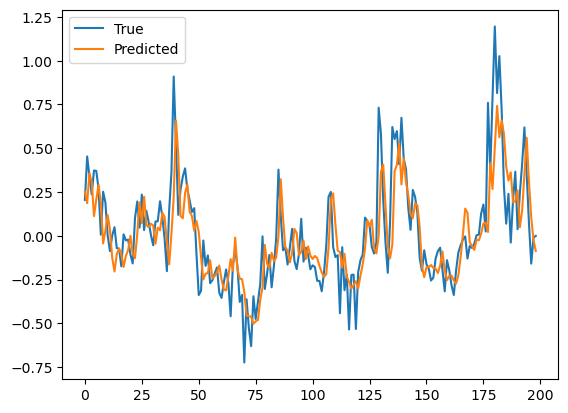

In [11]:
#LSTM Model
seq_length = 100

model = keras.models.Sequential([
    keras.layers.LSTM(seq_length, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# pass tensors instead of numpy arrays
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
y_pred = model.predict(X_test_tensor)
y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency

DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
DataProcess.plot(y_test_tensor, y_pred)

# Evaluation

# Using other data

In [12]:
# Preprocess data for other tickers

X_train_app, X_test_app, y_train_app, y_test_app = DataProcess.preprocess_data(aaplHistIV, 'AAPL', seq_length=60, splits=5, window=21)
X_train_app_reshape = X_train_app.reshape(X_train_app.shape[0],X_train_app.shape[1]*X_train_app.shape[2])
X_test_app_reshape = X_test_app.reshape(X_test_app.shape[0],X_test_app.shape[1]*X_test_app.shape[2])

X_train_goog, X_test_goog, y_train_goog, y_test_goog = DataProcess.preprocess_data(googHistIV, 'GOOG', seq_length=60, splits=5, window=21)
X_train_goog_reshape = X_train_goog.reshape(X_train_goog.shape[0],X_train_goog.shape[1]*X_train_goog.shape[2])
X_test_goog_reshape = X_test_goog.reshape(X_test_goog.shape[0],X_test_goog.shape[1]*X_test_goog.shape[2])

X_train_msft, X_test_msft, y_train_msft, y_test_msft = DataProcess.preprocess_data(msftHistIV, 'MSFT', seq_length=60, splits=5, window=21)
X_train_msft_reshape = X_train_msft.reshape(X_train_msft.shape[0],X_train_msft.shape[1]*X_train_msft.shape[2])
X_test_msft_reshape = X_test_msft.reshape(X_test_msft.shape[0],X_test_msft.shape[1]*X_test_msft.shape[2])

# X_train_ndx, X_test_ndx, y_train_ndx, y_test_ndx = DataProcess.preprocess_data(ndxHistIV, 'NDX', seq_length=60, splits=5, window=21)
# X_train_ndx_reshape = X_train_ndx.reshape(X_train_ndx.shape[0],X_train_ndx.shape[1]*X_train_ndx.shape[2])  # Data issues /FIX 
# X_test_ndx_reshape = X_test_ndx.reshape(X_test_ndx.shape[0],X_test_ndx.shape[1]*X_test_ndx.shape[2])

X_train_spy, X_test_spy, y_train_spy, y_test_spy = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)
X_train_spy_reshape = X_train_spy.reshape(X_train_spy.shape[0],X_train_spy.shape[1]*X_train_spy.shape[2])
X_test_spy_reshape = X_test_spy.reshape(X_test_spy.shape[0],X_test_spy.shape[1]*X_test_spy.shape[2])


In [13]:
# Combine the training and test sets into appropriate tuples for models
X_train_reshape_list = [X_train_app_reshape, X_train_goog_reshape, X_train_msft_reshape, X_train_spy_reshape]
X_test_reshape_list = [X_test_app_reshape, X_test_goog_reshape, X_test_msft_reshape, X_test_spy_reshape]
y_train_reshape_list = [y_train_app, y_train_goog, y_train_msft, y_train_spy]
y_test_reshape_list = [y_test_app, y_test_goog, y_test_msft, y_test_spy]


In [14]:
def average_metrics(model,X_train, X_test, y_train, y_test):
    RMSE, MAE, R2,MSE = 0,0,0,0
    for X_train, X_test, y_train, y_test in zip(X_train, X_test, y_train, y_test):
        RMSE_, MAE_, R2_, MSE_ = modelandeval(model,X_train, X_test, y_train, y_test)
        RMSE += RMSE_
        MAE += MAE_
        R2 += R2_
        MSE += MSE_
    print(f'Average RMSE: {RMSE/4}')
    print(f'Average MAE: {MAE/4}')
    print(f'Average R2: {R2/4}')
    print(f'Average MSE: {MSE/4}')
    return None

In [15]:
# xgboost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)




Average RMSE: 0.2854948037620782
Average MAE: 0.21926092939376757
Average R2: 0.5602175248375658
Average MSE: 0.08338524382516437


In [16]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.25785439311035296
Average MAE: 0.19660257634538741
Average R2: 0.6345823013213074
Average MSE: 0.06804529108839187


In [17]:
#GBRT Model

model =ensemble.GradientBoostingRegressor()
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)                 

Average RMSE: 0.26220455926863817
Average MAE: 0.19950810172205963
Average R2: 0.6294969440551631
Average MSE: 0.07047832153501019


In [18]:
#Bagging Model
model = ensemble.BaggingRegressor()
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.2764558819672246
Average MAE: 0.21114779269506956
Average R2: 0.5827123623889421
Average MSE: 0.07815804499727269


In [19]:
#STACKING MODEL

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.HistGradientBoostingRegressor()),
    ('bag',ensemble.BaggingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Average RMSE: 0.2943855655651359
Average MAE: 0.2289497606836905
Average R2: 0.5073201898285978
Average MSE: 0.0880119297619204


In [20]:
X_train_lstm = [X_train_app, X_train_goog, X_train_msft, X_train_spy]
X_test_lstm = [X_test_app ,X_test_goog, X_test_msft, X_test_spy]
y_train_lstm = [y_train_app, y_train_goog, y_train_msft, y_train_spy]
y_test_lstm = [y_test_app, y_test_goog, y_test_msft, y_test_spy]


In [21]:
#LSTM Model
seq_length = 60

model = keras.models.Sequential([
    keras.layers.LSTM(seq_length, return_sequences=True, input_shape=(X_train_lstm[0].shape[1], X_train_lstm[0].shape[2])),
    keras.layers.LSTM(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')




C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
rmse, mae, r2, mse  = 0,0,0,0

for X_train, X_test, y_train, y_test in zip(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm):
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
    model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
    y_pred = model.predict(X_test_tensor)
    y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
    MSE, RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
    rmse += RMSE
    mae += MAE
    r2 += R2
    mse += MSE

print(f'Average RMSE: {rmse/4}')
print(f'Average MAE: {mae/4}')
print(f'Average R2: {r2/4}')
print(f'Average MSE: {mse/4}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.6114
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2142
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1766
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1722
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1566
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1081
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1265
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1158
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1090
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1002
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0993
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0916
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0942
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1013
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0800
Epoc

In [23]:
#gru model
model = keras.models.Sequential([
    keras.layers.GRU(seq_length, return_sequences=True, input_shape=(X_train_lstm[0].shape[1], X_train_lstm[0].shape[2])),
    keras.layers.GRU(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
rmse, mae, r2, mse  = 0,0,0,0
allhistory= []
for X_train, X_test, y_train, y_test in zip(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm):
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
    history = model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
    y_pred = model.predict(X_test_tensor)
    y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
    MSE, RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
    rmse += RMSE
    mae += MAE
    r2 += R2
    mse += MSE
    allhistory+=history
print(f'Average RMSE: {rmse/4}')
print(f'Average MAE: {mae/4}')
print(f'Average R2: {r2/4}')
print(f'Average MSE: {mse/4}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0070
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0060
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0056
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0063
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0064
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0058
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0046
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0055
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0060
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0060
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0040
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0043
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0042
Epoc

TypeError: 'History' object is not iterable

In [27]:
allhistory

[]

In [ ]:
t